In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-march-madness-statistical-analysis/DEV _ March Madness.csv


In [2]:
df = pd.read_csv('/kaggle/input/2024-march-madness-statistical-analysis/DEV _ March Madness.csv')

In [3]:
df.head(10)

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Active Coaching Length,Active Coaching Length Index,Conference,Team Name,Net Rating,Net Rating Rank,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2024,57.096289,6,14.876492,50,36.472761,15,33.299900,161,45.096004,...,5 years,6,Big East Conference,UConn,32.2,1,1,East,March Madness,1
1,2024,49.733656,229,13.744375,10,36.875496,13,29.927361,260,44.018857,...,9 years,10,Big 12 Conference,Houston,31.8,2,1,South,March Madness,1
2,2024,55.967826,13,16.465733,145,37.371855,8,42.812662,9,47.723971,...,18 years,19,Big Ten Conference (Big 10),Purdue,29.1,3,1,Midwest,March Madness,1
3,2024,54.085700,41,14.896782,51,33.333333,52,38.266069,48,43.638743,...,9 years,10,Southeastern Conference (SEC),Auburn,28.9,4,4,East,March Madness,1
4,2024,51.907631,110,15.661234,80,31.615120,94,36.094378,92,47.082380,...,2 years,3,Big 12 Conference,Iowa State,26.8,5,2,East,March Madness,1
5,2024,54.955378,26,16.114629,110,36.325852,16,36.730860,81,48.666343,...,2 years,3,Pac-12 Conference,Arizona,26.6,6,2,West,March Madness,1
6,2024,51.492915,135,14.520261,36,32.409012,75,34.311741,132,45.476445,...,8 years,9,Southeastern Conference (SEC),Tennessee,26.0,7,2,Midwest,March Madness,1
7,2024,55.224274,21,14.349072,31,31.848341,86,33.773087,148,48.996746,...,1 years,2,Atlantic Coast Conference (ACC),Duke,24.8,8,4,South,March Madness,1
8,2024,51.294118,146,14.396825,33,32.802548,64,36.847059,78,46.399619,...,2 years,3,Atlantic Coast Conference (ACC),North Carolina,24.6,9,1,West,March Madness,1
9,2024,53.670394,50,15.205725,63,35.973041,18,37.384541,66,47.843602,...,6 years,7,Big Ten Conference (Big 10),Illinois,24.0,10,3,East,March Madness,1


In [4]:
df.tail(10)

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Active Coaching Length,Active Coaching Length Index,Conference,Team Name,Net Rating,Net Rating Rank,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
352,2024,46.863237,315,21.047293,344,29.785156,145,37.013802,76,53.951794,...,32 years,33,Southland Conference (SLC),Houston Christian,-22.0,353,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
353,2024,45.998849,335,21.167673,346,23.783287,325,27.633851,316,54.421769,...,1 years,2,Southern Conference (SoCon),VMI,-22.0,353,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
354,2024,47.197165,301,21.208226,347,32.738095,66,32.538660,187,52.980342,...,11 years,12,Northeast Conference (NEC),St. Francis (PA),-22.3,355,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
355,2024,43.318270,358,18.047505,245,23.828125,323,38.282763,47,53.924133,...,4 years,5,"Ohio Valley Conference (OVC, The Valley)",Lindenwood,-22.4,356,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
356,2024,44.738339,352,23.463687,361,33.156499,56,30.830489,240,51.795005,...,4 years,5,Metro Atlantic Athletic Conference (MAAC),Siena,-22.6,357,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
357,2024,46.662831,324,19.520247,322,22.506862,346,22.612198,358,52.718287,...,10 years,11,Northeast Conference (NEC),Stonehill,-22.9,358,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
358,2024,46.415553,328,16.836970,170,18.719690,361,37.120292,73,56.335616,...,2 years,3,West Coast Conference (WCC),Pacific,-23.0,359,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
359,2024,46.495620,326,21.344583,351,29.905561,137,33.229036,162,58.203593,...,2 years,3,Horizon League,IUPUI,-25.6,360,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
360,2024,42.106938,361,22.956835,360,27.029608,251,31.126671,232,51.301922,...,0 years,1,Mid-Eastern Athletic Conference (MEAC),Coppin State,-25.9,361,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
361,2024,42.489137,360,24.009167,362,27.876520,215,33.022967,168,55.552309,...,1 years,2,Southwestern Conference (SWC),Mississippi Valley State,-31.3,362,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 151 entries, Season to Post-Season Tournament Sorting Index
dtypes: float64(71), int64(73), object(7)
memory usage: 427.2+ KB


Data Cleaning

In [6]:
# Remove duplicate rows based on all columns
df_unique = df.drop_duplicates()

print(df_unique)

     Season  Off.eFG %  Off.eFG % Rank   Off.TO %  Off.TO % Rank   Off.OR %  \
0      2024  57.096289               6  14.876492             50  36.472761   
1      2024  49.733656             229  13.744375             10  36.875496   
2      2024  55.967826              13  16.465733            145  37.371855   
3      2024  54.085700              41  14.896782             51  33.333333   
4      2024  51.907631             110  15.661234             80  31.615120   
..      ...        ...             ...        ...            ...        ...   
357    2024  46.662831             324  19.520247            322  22.506862   
358    2024  46.415553             328  16.836970            170  18.719690   
359    2024  46.495620             326  21.344583            351  29.905561   
360    2024  42.106938             361  22.956835            360  27.029608   
361    2024  42.489137             360  24.009167            362  27.876520   

     Off.OR % Rank  Off.FT Rate  Off.FT Rate Rank  

In [10]:
# Check for negative values

negative_values_check = (df_unique.select_dtypes(include=['int64', 'float64']) < 0).any()

In [11]:
negative_values_check

Season                                  False
Off.eFG %                               False
Off.eFG % Rank                          False
Off.TO %                                False
Off.TO % Rank                           False
                                        ...  
Raw Defensive Efficiency Rank           False
Active Coaching Length Index            False
Net Rating                               True
Net Rating Rank                         False
Post-Season Tournament Sorting Index    False
Length: 144, dtype: bool

In [12]:
# get the number of missing data points per column
missing_values_count = df_unique.isnull().sum()

In [13]:
missing_values_count

Season                                  0
Off.eFG %                               0
Off.eFG % Rank                          0
Off.TO %                                0
Off.TO % Rank                           0
                                       ..
Net Rating Rank                         0
Seed                                    0
Region                                  0
Post-Season Tournament                  0
Post-Season Tournament Sorting Index    0
Length: 151, dtype: int64

In [14]:
df_unique.shape

(362, 151)

Summary Statistics

In [16]:
df_unique.describe()

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,Adjusted Defensive Efficiency,Adjusted Defensive Efficiency Rank,Raw Defensive Efficiency,Raw Defensive Efficiency Rank,Active Coaching Length Index,Net Rating,Net Rating Rank,Post-Season Tournament Sorting Index
count,362.0,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,...,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,2024.0,50.403477,181.497238,17.156930,181.500000,28.890469,181.497238,32.981456,181.494475,50.506171,...,105.004144,181.500000,106.104972,181.500000,105.259116,181.500000,5.983425,-0.000829,181.234807,3.875691
std,0.0,3.058721,104.642757,2.032579,104.644637,4.056441,104.647310,4.751904,104.644266,2.401518,...,6.508342,104.644637,5.958483,104.644637,5.047419,104.644637,5.555038,11.952326,104.636464,1.653843
min,2024.0,41.011236,1.000000,12.001324,1.000000,17.047619,1.000000,21.419903,1.000000,43.638743,...,83.300000,1.000000,87.100000,1.000000,88.300000,1.000000,1.000000,-31.300000,1.000000,1.000000
25%,2024.0,48.301763,91.250000,15.781653,91.250000,26.207573,91.250000,29.474786,91.250000,49.000978,...,100.625000,91.250000,101.400000,91.250000,101.825000,91.250000,2.000000,-8.100000,91.250000,2.000000
50%,2024.0,50.588130,181.500000,17.061629,181.500000,28.677211,181.500000,32.729418,181.500000,50.419173,...,105.150000,181.500000,106.650000,181.500000,105.000000,181.500000,5.000000,-1.950000,181.000000,5.000000
75%,2024.0,52.174916,271.750000,18.281236,271.750000,31.711535,271.750000,36.109359,271.750000,52.143206,...,109.675000,271.750000,110.900000,271.750000,109.075000,271.750000,8.000000,8.700000,271.750000,5.000000
max,2024.0,59.858416,362.000000,24.009167,362.000000,41.958542,362.000000,49.968133,362.000000,58.203593,...,122.700000,362.000000,120.400000,362.000000,119.400000,362.000000,39.000000,32.200000,362.000000,5.000000


In [17]:
df_unique.columns

Index(['Season', 'Off.eFG %', 'Off.eFG % Rank', 'Off.TO %', 'Off.TO % Rank',
       'Off.OR %', 'Off.OR % Rank', 'Off.FT Rate', 'Off.FT Rate Rank',
       'Def.eFG %',
       ...
       'Active Coaching Length', 'Active Coaching Length Index', 'Conference',
       'Team Name', 'Net Rating', 'Net Rating Rank', 'Seed', 'Region',
       'Post-Season Tournament', 'Post-Season Tournament Sorting Index'],
      dtype='object', length=151)

In [18]:
df_unique['Season'].value_counts()

Season
2024    362
Name: count, dtype: int64

In [19]:
df_unique['Off.eFG %'].value_counts()

Off.eFG %
49.029126    2
57.096289    1
51.521240    1
51.431780    1
46.764032    1
            ..
52.064220    1
50.784683    1
51.080432    1
52.066340    1
42.489137    1
Name: count, Length: 361, dtype: int64

In [20]:
df_unique['Off.eFG % Rank'].value_counts()

Off.eFG % Rank
252    2
6      1
133    1
140    1
320    1
      ..
97     1
166    1
152    1
96     1
360    1
Name: count, Length: 361, dtype: int64

In [21]:
df_unique['Off.TO %'].value_counts()

Off.TO %
14.876492    1
20.715694    1
15.631542    1
16.395270    1
18.278103    1
            ..
14.288372    1
15.542211    1
12.812523    1
21.527455    1
24.009167    1
Name: count, Length: 362, dtype: int64

In [22]:
df_unique['Off.TO % Rank'].value_counts()

Off.TO % Rank
50     1
342    1
79     1
137    1
271    1
      ..
27     1
76     1
3      1
353    1
362    1
Name: count, Length: 362, dtype: int64

In [23]:
df_unique['Off.OR %'].value_counts()

Off.OR %
32.075472    2
36.472761    1
26.984127    1
23.600345    1
22.443182    1
            ..
27.492740    1
26.137566    1
29.878049    1
32.791328    1
27.876520    1
Name: count, Length: 361, dtype: int64

In [24]:
df_unique['Off.OR % Rank'].value_counts()

Off.OR % Rank
80     2
15     1
255    1
330    1
347    1
      ..
231    1
273    1
138    1
65     1
215    1
Name: count, Length: 361, dtype: int64

In [72]:
df_unique['Def.eFG %'].value_counts()

Def.eFG %
50.000000    4
45.096004    1
52.423168    1
54.388985    1
52.004860    1
            ..
48.501199    1
51.739405    1
49.026501    1
48.573779    1
55.552309    1
Name: count, Length: 359, dtype: int64

In [25]:
df_unique['Off.FT Rate Rank'].value_counts()

Off.FT Rate Rank
309    2
67     2
161    1
248    1
359    1
      ..
192    1
112    1
176    1
35     1
168    1
Name: count, Length: 360, dtype: int64

In [26]:
df_unique['Active Coaching Length'].value_counts()

Active Coaching Length
0 years     58
1 years     58
2 years     47
4 years     43
5 years     25
7 years     18
3 years     17
6 years     16
12 years    13
10 years    12
13 years    11
8 years      8
9 years      7
16 years     5
14 years     5
18 years     5
11 years     3
24 years     2
20 years     2
17 years     2
22 years     1
28 years     1
21 years     1
39 years     1
32 years     1
Name: count, dtype: int64

In [28]:
df_unique['Team Name'].value_counts()

Team Name
UConn                       1
Mount St. Marys             1
San Jose State              1
Portland State              1
Cal State Bakersfield       1
                           ..
UC San Diego                1
Charlotte                   1
UNC Wilmington              1
UT Arlington                1
Mississippi Valley State    1
Name: count, Length: 362, dtype: int64

In [ ]:
df_unique[''].value_counts()

In [29]:
df_unique['Net Rating Rank'].value_counts()

Net Rating Rank
195    4
275    3
267    3
245    3
234    3
      ..
127    1
131    1
132    1
135    1
362    1
Name: count, Length: 282, dtype: int64

In [31]:
df_unique['Region'].value_counts()

Region
Not In a Post-Season Tournament    238
Midwest                             18
South                               17
West                                17
East                                16
CBI                                 15
NIT 2                                8
NIT 4                                8
NIT 3                                8
NIT 1                                8
Lou Henson Classic                   4
Jim Phelan Classic                   2
High Durham Classic                  2
John McLendon Classic                1
Name: count, dtype: int64

In [32]:
df_unique['Post-Season Tournament Sorting Index'].value_counts()

Post-Season Tournament Sorting Index
5    238
1     68
2     32
3     15
4      9
Name: count, dtype: int64

Data Visualization

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_unique.columns

Index(['Season', 'Off.eFG %', 'Off.eFG % Rank', 'Off.TO %', 'Off.TO % Rank',
       'Off.OR %', 'Off.OR % Rank', 'Off.FT Rate', 'Off.FT Rate Rank',
       'Def.eFG %',
       ...
       'Active Coaching Length', 'Active Coaching Length Index', 'Conference',
       'Team Name', 'Net Rating', 'Net Rating Rank', 'Seed', 'Region',
       'Post-Season Tournament', 'Post-Season Tournament Sorting Index'],
      dtype='object', length=151)

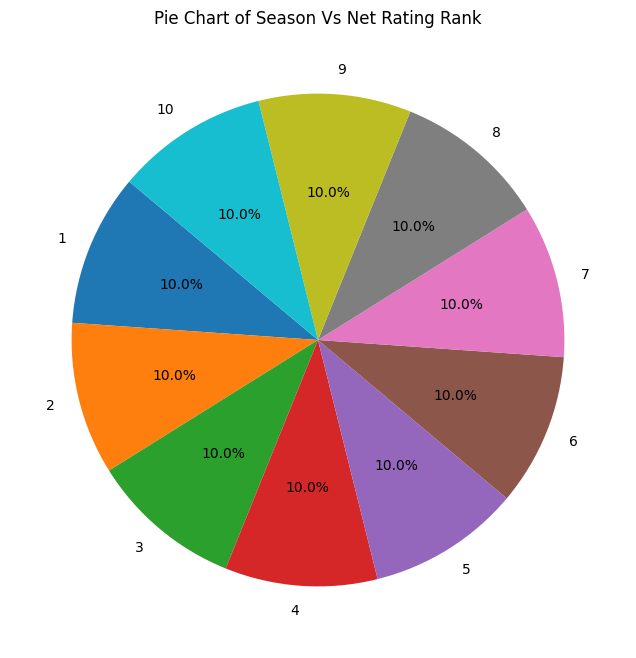

In [35]:
# piechart of Season vs Net Rating Rank

# Select the first 10 rows
df_top10 = df_unique.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(df_top10['Season'], labels=df_top10['Net Rating Rank'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Season Vs Net Rating Rank')
plt.show()

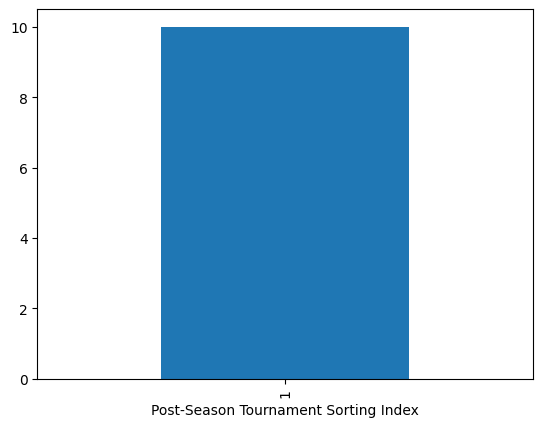

In [39]:
# barchart of Post-Season Tournament Sorting Index

df_unique['Post-Season Tournament Sorting Index'].head(10).value_counts().plot(kind='bar')
plt.show()

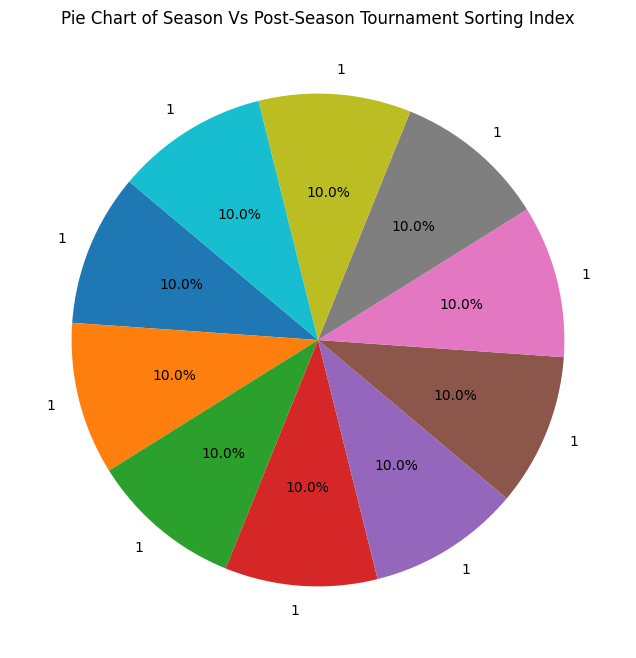

In [41]:
# piechart of Season vs Post-Season Tournament Sorting Index

# Select the first 10 rows
df_top10 = df_unique.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(df_top10['Season'], labels=df_top10['Post-Season Tournament Sorting Index'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Season Vs Post-Season Tournament Sorting Index')
plt.show()

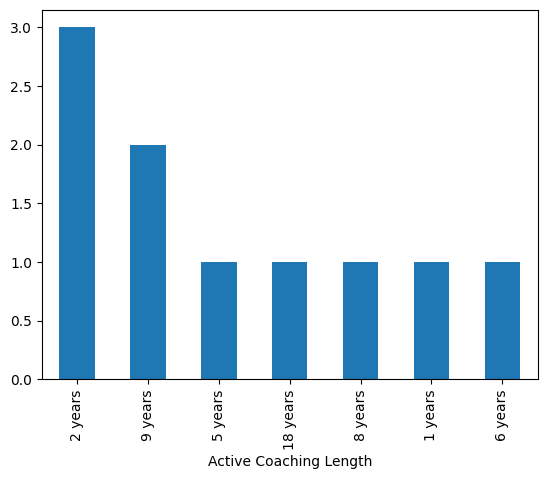

In [47]:
df_unique['Active Coaching Length'].head(10).value_counts().plot(kind='bar')
plt.show()

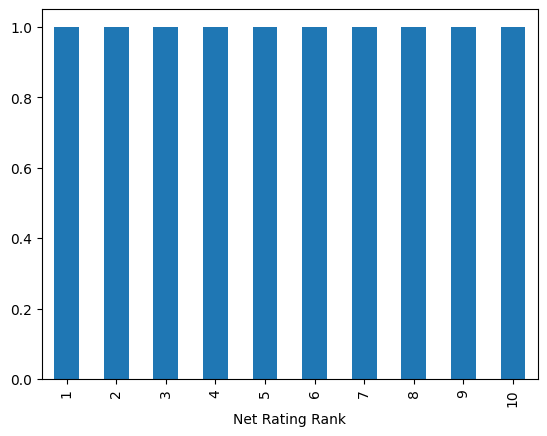

In [45]:
df_unique['Net Rating Rank'].head(10).value_counts().plot(kind='bar')
plt.show()

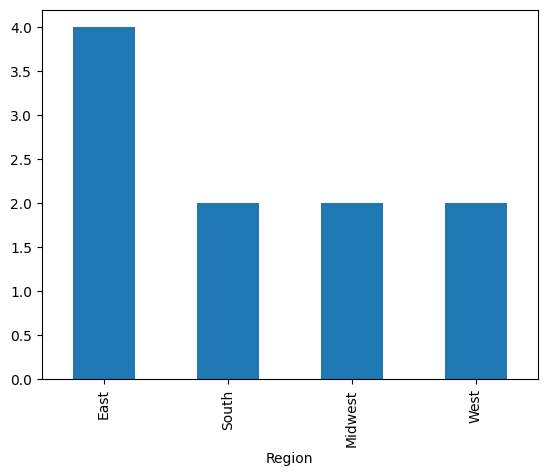

In [43]:
df_unique['Region'].head(10).value_counts().plot(kind='bar')
plt.show()

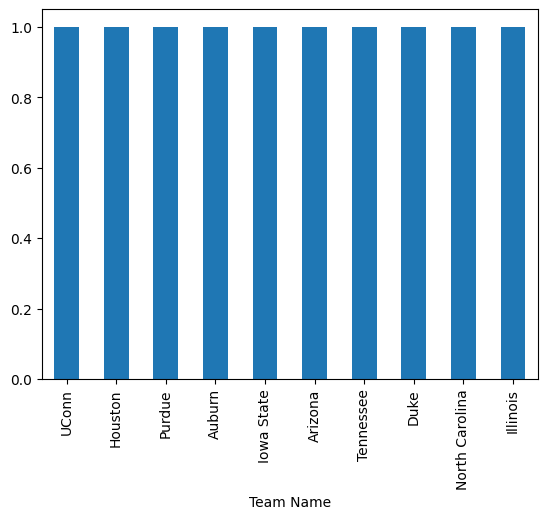

In [50]:
df_unique['Team Name'].head(10).value_counts().plot(kind='bar')
plt.show()

In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [55]:
df_unique.columns

Index(['Season', 'Off.eFG %', 'Off.eFG % Rank', 'Off.TO %', 'Off.TO % Rank',
       'Off.OR %', 'Off.OR % Rank', 'Off.FT Rate', 'Off.FT Rate Rank',
       'Def.eFG %',
       ...
       'Active Coaching Length', 'Active Coaching Length Index', 'Conference',
       'Team Name', 'Net Rating', 'Net Rating Rank', 'Seed', 'Region',
       'Post-Season Tournament', 'Post-Season Tournament Sorting Index'],
      dtype='object', length=151)

In [94]:
import pandas as pd

# Load the data
df = pd.read_csv('/kaggle/input/2024-march-madness-statistical-analysis/DEV _ March Madness.csv')

# Filter functions
def filter_by_team(df, team_name):
    """Filter the dataframe by a specific team."""
    return df[df['Team Name'].str.contains(team_name, case=False)]

def filter_by_conference(df, conference_name):
    """Filter the dataframe by a specific conference."""
    return df[df['Conference'].str.contains(conference_name, case=False)]

# Power 6 Conference Insights
def power_6_insights(df):
    """Filter the dataframe for Power 6 conferences."""
    power_6 = ['ACC', 'Big 10', 'Big 12', 'Big East', 'Pac-12', 'SEC']
    return df[df['Conference'].str.contains('|'.join(power_6), case=False)]

# Tournament Projections based on Joe Lunardi's Bracketology
def tournament_projections(df):
    """Assuming projections are integrated into the dataset."""
    return df[df['Post-Season Tournament'] == 'March Madness']

# Championship DNA Analysis
def championship_dna(df):
    """Identify teams with potential to win, based on historical performance."""
    # Assuming 'Championship DNA' is determined by a specific metric (e.g., Net Rating)
    top_performers = df.sort_values(by='Net Rating', ascending=False).head(10)
    return top_performers

# Season Efficiency Overviews
def season_efficiency_overviews(df):
    """Present data on the season's efficiency for teams."""
    return df[['Team Name', 'Off.eFG %', 'Def.eFG %', 'Net Rating']]

# Detailed Performance Metrics
def detailed_performance_metrics(df):
    """Break down essential metrics influencing outcomes."""
    return df[['Team Name', 'Off.eFG %', 'Off.TO %', 'Def.eFG %', 'Def.TO %']]


team_filter = filter_by_team(df, "Duke")
conference_filter = filter_by_conference(df, "Big 12")
power_6 = power_6_insights(df)
tournament_projection = tournament_projections(df)
championship_teams = championship_dna(df)
efficiency_overview = season_efficiency_overviews(df)
performance_metrics = detailed_performance_metrics(df)

In [96]:
team_filter

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Active Coaching Length,Active Coaching Length Index,Conference,Team Name,Net Rating,Net Rating Rank,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
7,2024,55.224274,21,14.349072,31,31.848341,86,33.773087,148,48.996746,...,1 years,2,Atlantic Coast Conference (ACC),Duke,24.8,8,4,South,March Madness,1


In [98]:
power_6

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Active Coaching Length,Active Coaching Length Index,Conference,Team Name,Net Rating,Net Rating Rank,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2024,57.096289,6,14.876492,50,36.472761,15,33.299900,161,45.096004,...,5 years,6,Big East Conference,UConn,32.2,1,1,East,March Madness,1
1,2024,49.733656,229,13.744375,10,36.875496,13,29.927361,260,44.018857,...,9 years,10,Big 12 Conference,Houston,31.8,2,1,South,March Madness,1
2,2024,55.967826,13,16.465733,145,37.371855,8,42.812662,9,47.723971,...,18 years,19,Big Ten Conference (Big 10),Purdue,29.1,3,1,Midwest,March Madness,1
3,2024,54.085700,41,14.896782,51,33.333333,52,38.266069,48,43.638743,...,9 years,10,Southeastern Conference (SEC),Auburn,28.9,4,4,East,March Madness,1
4,2024,51.907631,110,15.661234,80,31.615120,94,36.094378,92,47.082380,...,2 years,3,Big 12 Conference,Iowa State,26.8,5,2,East,March Madness,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2024,49.792531,223,18.380734,276,26.384693,268,35.566094,104,51.320967,...,9 years,10,Pac-12 Conference,Oregon State,0.8,159,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
186,2024,45.442431,344,15.285309,67,28.160920,208,35.181237,113,53.003721,...,4 years,5,Southeastern Conference (SEC),Vanderbilt,-2.3,186,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
200,2024,48.607392,265,17.934230,239,33.419023,49,33.904660,147,55.676263,...,0 years,1,Big East Conference,Georgetown,-3.1,201,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
201,2024,48.363339,269,18.124551,254,28.205128,204,38.843426,41,54.576720,...,1 years,2,Atlantic Coast Conference (ACC),Louisville,-3.1,201,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5


In [97]:
conference_filter

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Active Coaching Length,Active Coaching Length Index,Conference,Team Name,Net Rating,Net Rating Rank,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
1,2024,49.733656,229,13.744375,10,36.875496,13,29.927361,260,44.018857,...,9 years,10,Big 12 Conference,Houston,31.8,2,1,South,March Madness,1
4,2024,51.907631,110,15.661234,80,31.615120,94,36.094378,92,47.082380,...,2 years,3,Big 12 Conference,Iowa State,26.8,5,2,East,March Madness,1
13,2024,55.531095,16,17.647529,217,35.108481,24,40.451293,21,51.317957,...,20 years,21,Big 12 Conference,Baylor,22.3,14,3,West,March Madness,1
15,2024,55.052431,23,15.232737,65,32.805995,63,25.262154,348,48.048279,...,4 years,5,Big 12 Conference,BYU,21.0,16,6,East,March Madness,1
21,2024,53.400787,55,16.431464,141,25.252525,291,32.771220,180,47.556391,...,20 years,21,Big 12 Conference,Kansas,19.2,22,4,Midwest,March Madness,1
25,2024,52.844232,70,16.529111,150,30.185185,129,34.556087,131,49.054192,...,0 years,1,Big 12 Conference,Texas Tech,18.5,24,6,South,March Madness,1
26,2024,53.700745,49,16.619771,156,30.479774,119,30.404686,250,48.954320,...,1 years,2,Big 12 Conference,Texas,18.4,27,7,Midwest,March Madness,1
32,2024,51.854599,114,17.933616,238,35.486649,21,35.113749,118,50.320513,...,7 years,8,Big 12 Conference,TCU,17.3,32,9,Midwest,March Madness,1
35,2024,50.023518,214,17.396205,203,37.209302,10,27.845720,312,47.606925,...,2 years,3,Big 12 Conference,Cincinnati,16.8,36,2,NIT 3,NIT,2
43,2024,53.086763,65,18.082425,251,30.067895,133,37.652948,61,47.467672,...,2 years,3,Big 12 Conference,Oklahoma,16.1,43,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5


In [99]:
tournament_projection 

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Active Coaching Length,Active Coaching Length Index,Conference,Team Name,Net Rating,Net Rating Rank,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2024,57.096289,6,14.876492,50,36.472761,15,33.299900,161,45.096004,...,5 years,6,Big East Conference,UConn,32.2,1,1,East,March Madness,1
1,2024,49.733656,229,13.744375,10,36.875496,13,29.927361,260,44.018857,...,9 years,10,Big 12 Conference,Houston,31.8,2,1,South,March Madness,1
2,2024,55.967826,13,16.465733,145,37.371855,8,42.812662,9,47.723971,...,18 years,19,Big Ten Conference (Big 10),Purdue,29.1,3,1,Midwest,March Madness,1
3,2024,54.085700,41,14.896782,51,33.333333,52,38.266069,48,43.638743,...,9 years,10,Southeastern Conference (SEC),Auburn,28.9,4,4,East,March Madness,1
4,2024,51.907631,110,15.661234,80,31.615120,94,36.094378,92,47.082380,...,2 years,3,Big 12 Conference,Iowa State,26.8,5,2,East,March Madness,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2024,53.881279,45,16.757590,162,20.720721,356,30.707763,242,52.274019,...,0 years,1,Big Sky Conference,Montana State,-3.9,212,16,Midwest,March Madness,1
217,2024,53.433598,53,16.056705,106,27.695351,223,31.668558,217,52.033809,...,4 years,5,Atlantic Sun Conference (ASUN),Stetson,-4.1,217,16,East,March Madness,1
266,2024,48.213185,274,20.614451,341,28.340081,198,39.617991,31,49.076746,...,6 years,7,Southwestern Conference (SWC),Grambling,-7.8,267,16,Midwest,March Madness,1
275,2024,51.958002,106,21.689390,354,33.872502,39,42.224745,11,50.830654,...,4 years,5,Mid-Eastern Athletic Conference (MEAC),Howard,-8.3,275,16,West,March Madness,1


In [100]:
championship_teams

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Active Coaching Length,Active Coaching Length Index,Conference,Team Name,Net Rating,Net Rating Rank,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2024,57.096289,6,14.876492,50,36.472761,15,33.299900,161,45.096004,...,5 years,6,Big East Conference,UConn,32.2,1,1,East,March Madness,1
1,2024,49.733656,229,13.744375,10,36.875496,13,29.927361,260,44.018857,...,9 years,10,Big 12 Conference,Houston,31.8,2,1,South,March Madness,1
2,2024,55.967826,13,16.465733,145,37.371855,8,42.812662,9,47.723971,...,18 years,19,Big Ten Conference (Big 10),Purdue,29.1,3,1,Midwest,March Madness,1
3,2024,54.085700,41,14.896782,51,33.333333,52,38.266069,48,43.638743,...,9 years,10,Southeastern Conference (SEC),Auburn,28.9,4,4,East,March Madness,1
4,2024,51.907631,110,15.661234,80,31.615120,94,36.094378,92,47.082380,...,2 years,3,Big 12 Conference,Iowa State,26.8,5,2,East,March Madness,1
5,2024,54.955378,26,16.114629,110,36.325852,16,36.730860,81,48.666343,...,2 years,3,Pac-12 Conference,Arizona,26.6,6,2,West,March Madness,1
6,2024,51.492915,135,14.520261,36,32.409012,75,34.311741,132,45.476445,...,8 years,9,Southeastern Conference (SEC),Tennessee,26.0,7,2,Midwest,March Madness,1
7,2024,55.224274,21,14.349072,31,31.848341,86,33.773087,148,48.996746,...,1 years,2,Atlantic Coast Conference (ACC),Duke,24.8,8,4,South,March Madness,1
8,2024,51.294118,146,14.396825,33,32.802548,64,36.847059,78,46.399619,...,2 years,3,Atlantic Coast Conference (ACC),North Carolina,24.6,9,1,West,March Madness,1
9,2024,53.670394,50,15.205725,63,35.973041,18,37.384541,66,47.843602,...,6 years,7,Big Ten Conference (Big 10),Illinois,24.0,10,3,East,March Madness,1


In [101]:
efficiency_overview

,Team Name,Off.eFG %,Def.eFG %,Net Rating
0,UConn,57.096289,45.096004,32.2
1,Houston,49.733656,44.018857,31.8
2,Purdue,55.967826,47.723971,29.1
3,Auburn,54.085700,43.638743,28.9
4,Iowa State,51.907631,47.082380,26.8
...,...,...,...,...
357,Stonehill,46.662831,52.718287,-22.9
358,Pacific,46.415553,56.335616,-23.0
359,IUPUI,46.495620,58.203593,-25.6
360,Coppin State,42.106938,51.301922,-25.9


In [102]:
performance_metrics

,Team Name,Off.eFG %,Off.TO %,Def.eFG %,Def.TO %
0,UConn,57.096289,14.876492,45.096004,16.164308
1,Houston,49.733656,13.744375,44.018857,24.667057
2,Purdue,55.967826,16.465733,47.723971,13.989356
3,Auburn,54.085700,14.896782,43.638743,18.321330
4,Iowa State,51.907631,15.661234,47.082380,25.713762
...,...,...,...,...,...
357,Stonehill,46.662831,19.520247,52.718287,16.745310
358,Pacific,46.415553,16.836970,56.335616,16.119485
359,IUPUI,46.495620,21.344583,58.203593,18.481898
360,Coppin State,42.106938,22.956835,51.301922,21.839467
